## Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import seaborn as sns
import tensorflow as tf

## Step-1 Reading the DataSet and Visualizing 

In [100]:
import pandas as pd

# Loading the datasets
train_data = pd.read_csv(r"C:\Users\podeti venu goud\Downloads\Google_Stock_Price_Train.csv", thousands=',')
test_data = pd.read_csv(r"C:\Users\podeti venu goud\Downloads\Google_Stock_Price_Test.csv", thousands=',')

# Displaying basic information about the datasets
print("Train Data Summary:")
print(train_data.describe())

print("\nTest Data Summary:")
print(test_data.describe())


Train Data Summary:
              Open         High          Low        Close        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean    533.709833   537.880223   529.007409   712.669666  3.158107e+06
std     151.904442   153.008811   150.552807   164.752591  2.273726e+06
min     279.120000   281.210000   277.220000   491.200000  7.900000e+03
25%     404.115000   406.765000   401.765000   576.740000  1.621700e+06
50%     537.470000   540.750000   532.990000   695.675000  2.566150e+06
75%     654.922500   662.587500   644.800000   782.105000  4.122500e+06
max     816.680000   816.680000   805.140000  1216.830000  2.497790e+07

Test Data Summary:
             Open        High         Low       Close        Volume
count   20.000000   20.000000   20.000000   20.000000  2.000000e+01
mean   807.526000  811.926500  801.949500  807.904500  1.659895e+06
std     15.125428   14.381198   13.278607   13.210088  6.774747e+05
min    778.810000  789.630000  775.80000

Columns in the dataset:
['Date' 'Open' 'High' 'Low' 'Close' 'Volume']

Training Set:
       Date    Open    High     Low   Close    Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7380500
1  1/4/2012  331.27  333.87  329.08  666.45   5749400
2  1/5/2012  329.83  330.75  326.89  657.21   6590300
3  1/6/2012  328.34  328.77  323.68  648.24   5405900
4  1/9/2012  322.04  322.29  309.46  620.76  11688800

Testing Set:
           Date    Open    High     Low   Close   Volume
1022  1/27/2016  713.67  718.23  694.39  699.99  2194200
1023  1/28/2016  722.22  733.69  712.35  730.96  2676400
1024  1/29/2016  731.53  744.99  726.80  742.95  3474300
1025   2/1/2016  750.46  757.86  743.27  752.00  5139200
1026   2/2/2016  784.50  789.87  764.65  764.65  6348100


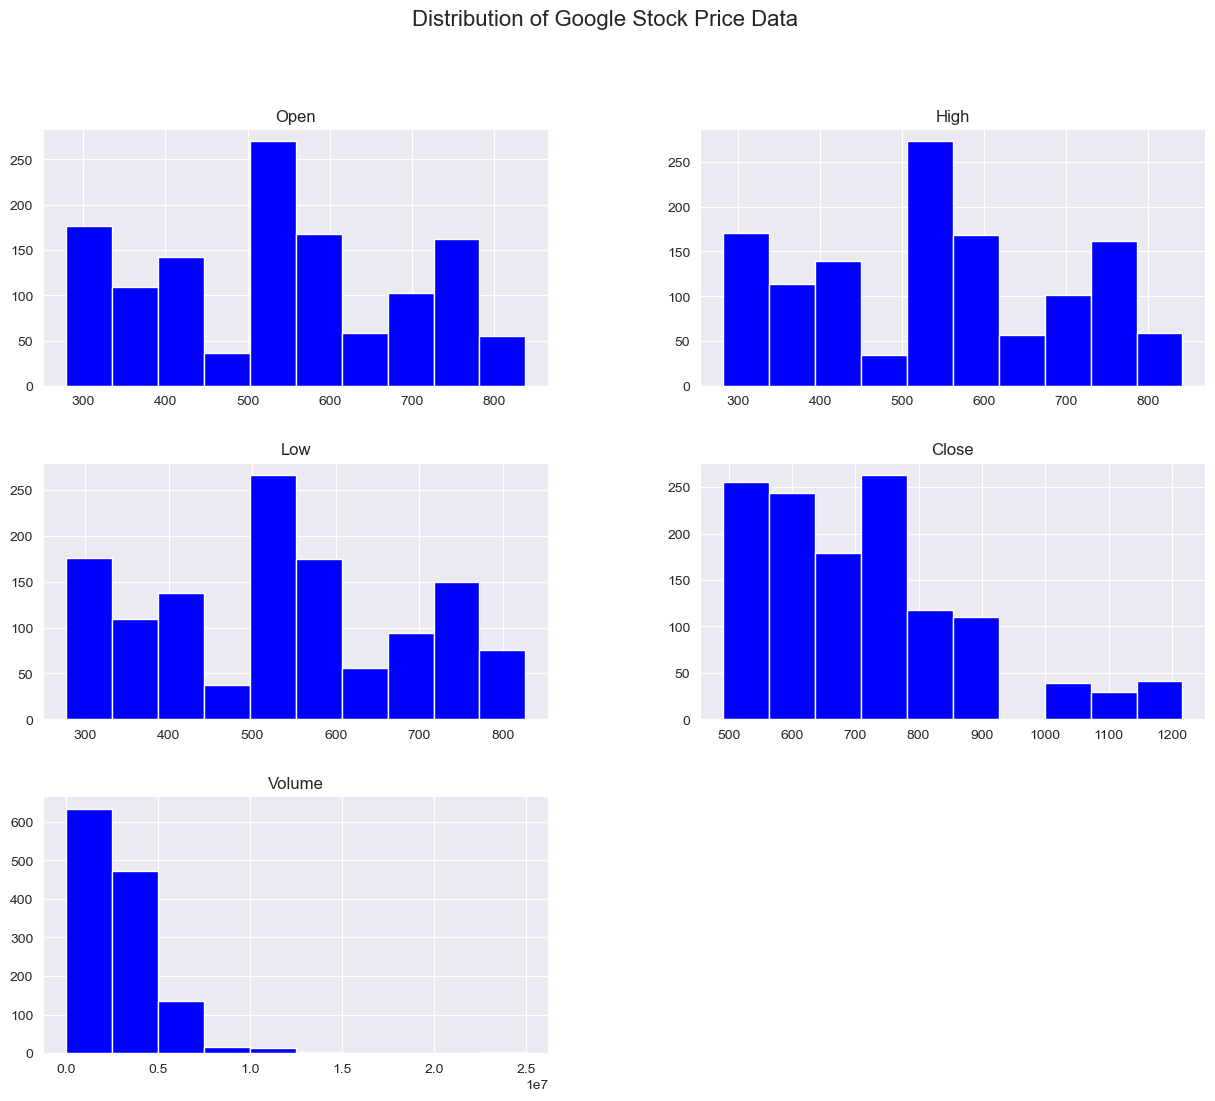

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Loading the Data
train_data = pd.read_csv(r"C:\Users\podeti venu goud\Downloads\Google_Stock_Price_Train.csv", thousands=',')
test_data = pd.read_csv(r"C:\Users\podeti venu goud\Downloads\Google_Stock_Price_Test.csv", thousands=',')

# Combine both datasets into a single DataFrame
true_df = pd.concat([train_data, test_data], axis=0)

# Step 2: Preprocessing the Data
# Dropping rows with missing values
true_df = true_df.dropna()

# Dropping duplicates
true_df = true_df.drop_duplicates()

# Resetting the index
true_df.reset_index(drop=True, inplace=True)

# Checking the column names
print("Columns in the dataset:")
print(true_df.columns.values)

# Step 3: Train & Test Definition
# Splitting the data into training and testing sets (90% train, 10% test)
train = true_df[:int(0.8 * len(true_df))] 
test = true_df.iloc[int(0.8 * len(true_df)):, :]  

# Displaying a preview of the training set
print("\nTraining Set:")
print(train.head())

# Displaying a preview of the test set
print("\nTesting Set:")
print(test.head())

# Step 4: Visualization
# Plotting histograms of the dataset
true_df.hist(figsize=(15, 12), color='blue')
plt.suptitle('Distribution of Google Stock Price Data', fontsize=16)
plt.show()


## Step-2 Bulding the RNN Model

In [87]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

# Step 2: Reading and Preprocessing the Dataset
train_data = pd.read_csv(r"C:\Users\podeti venu goud\Downloads\Google_Stock_Price_Train.csv", thousands=',')
test_data = pd.read_csv(r"C:\Users\podeti venu goud\Downloads\Google_Stock_Price_Test.csv", thousands=',')

# Dropping rows with missing values and duplicates
train_data = train_data.dropna()
train_data = train_data.drop_duplicates()
test_data = test_data.dropna()
test_data = test_data.drop_duplicates()

# Resetting index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Selecting 'Close' column for training and test
train_close = train_data.iloc[:, 4:5].values  # 'Close' is at index 4
test_close = test_data.iloc[:, 4:5].values

# Step 3: Normalizing the Data
scaler = MinMaxScaler(feature_range=(-1, 1))
train_scaled = scaler.fit_transform(train_close)
test_scaled = scaler.transform(test_close)

# Step 4: Creating Sequences for Training
# Using past 60 days data to predict the next day's price
X_train = []
y_train = []

for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])  # 60 previous days' stock prices
    y_train.append(train_scaled[i, 0])  # next day's stock price

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping the data to be compatible with the RNN input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Step 5: Building the RNN Model
rnn_model = Sequential()

# Adding RNN layers with dropout regularization
rnn_model.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dropout(0.2))

# Output layer
rnn_model.add(Dense(units=1))

# Compiling the RNN
rnn_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

# Step 6: Training the Model
rnn_history = rnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Preparing Test Data
total_data = pd.concat((train_data['Close'], test_data['Close']), axis=0)
total_data.reset_index(drop=True, inplace=True)

# Preparing inputs for prediction from the last 60 days of data
inputs = total_data[len(total_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

# Creating test sequences
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Step 7: Making Predictions
predicted_stock_price = rnn_model.predict(X_test)

# Inverse transforming predictions
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Results
print("Predicted Stock Prices:", predicted_stock_price[:5])  # Display first 5 predictions


C:\Users\podeti venu goud\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - loss: 0.5261 - mean_absolute_error: 0.5708
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.2836 - mean_absolute_error: 0.4274
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.1987 - mean_absolute_error: 0.3508
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.1320 - mean_absolute_error: 0.2861
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.1391 - mean_absolute_error: 0.2897
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.1275 - mean_absolute_error: 0.2726
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.1012 - mean_absolute_error: 0.2478
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0877 - mean_absolute_error: 0.2337
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0761 - mean_absolute_error: 0.2080
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0707 - mean_absolute_error: 0.2046
Epoch 11/100
38/38 ━━━━━━━━━

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0116 - mean_absolute_error: 0.0628
Epoch 64/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0103 - mean_absolute_error: 0.0606
Epoch 65/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0095 - mean_absolute_error: 0.0575
Epoch 66/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0110 - mean_absolute_error: 0.0646
Epoch 67/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0123 - mean_absolute_error: 0.0664
Epoch 68/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0089 - mean_absolute_error: 0.0585
Epoch 69/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0106 - mean_absolute_error: 0.0609
Epoch 70/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0098 - mean_absolute_error: 0.0564
Epoch 71/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0105 - mean_absolute_error: 0.0593
Epoch 72/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0107 - mean_absolute_error: 0.0589
Epoch 73/100
38/38 ━━━━━━━━━━━━━━

In [88]:
# Step 8: Evaluating the Model

# Real stock prices for test data
real_stock_price = test_close

# R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(real_stock_price, predicted_stock_price)
print(f"R2 Score: {r2}")

# RMSE
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"RMSE: {rmse}")


R2 Score: 0.3622686949968429
RMSE: 10.282207947570527


## Visualizing the RNN Model

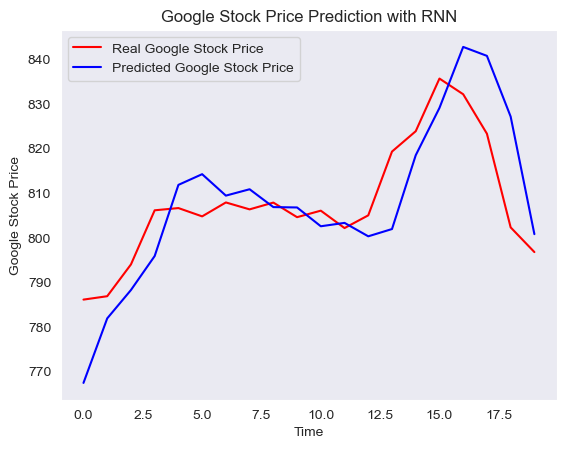

In [89]:
# Step 9: Plotting the Real vs Predicted Stock Prices

import matplotlib.pyplot as plt

# Plotting real stock prices vs predicted stock prices
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction with RNN')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


## Step-3 Building LSTM Model

In [106]:
# LSTM Model
from tensorflow.keras.layers import LSTM

# Step 5: Building the LSTM Model
lstm_model = Sequential()

# Adding LSTM layers with dropout regularization
lstm_model.add(LSTM(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50, activation="tanh", return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50, activation="tanh"))
lstm_model.add(Dropout(0.2))

# Output layer
lstm_model.add(Dense(units=1))

# Compiling the LSTM
lstm_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

# Step 6: Training the LSTM Model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making Predictions
lstm_predicted_price = lstm_model.predict(X_test)

# Inverse transforming predictions
lstm_predicted_price = scaler.inverse_transform(lstm_predicted_price)

# Results
print("Predicted Stock Prices (LSTM):", lstm_predicted_price[:5])  # Display first 5 predictions


C:\Users\podeti venu goud\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 0.1438 - mean_absolute_error: 0.2737
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0303 - mean_absolute_error: 0.1024
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0248 - mean_absolute_error: 0.0906
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0215 - mean_absolute_error: 0.0833
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0210 - mean_absolute_error: 0.0813
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0186 - mean_absolute_error: 0.0773
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0199 - mean_absolute_error: 0.0786
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0209 - mean_absolute_error: 0.0838
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0176 - mean_absolute_error: 0.0723
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0158 - mean_absolute_error: 0.0740
Epoch 11/100
38/38 ━━━━━━━━

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0086 - mean_absolute_error: 0.0532
Epoch 64/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0095 - mean_absolute_error: 0.0521
Epoch 65/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0094 - mean_absolute_error: 0.0516
Epoch 66/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0080 - mean_absolute_error: 0.0482
Epoch 67/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0078 - mean_absolute_error: 0.0500
Epoch 68/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0073 - mean_absolute_error: 0.0494
Epoch 69/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0075 - mean_absolute_error: 0.0502
Epoch 70/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0099 - mean_absolute_error: 0.0542
Epoch 71/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0083 - mean_absolute_error: 0.0482
Epoch 72/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0098 - mean_absolute_error: 0.0526
Epoch 73/100
38/38 ━━━━━━━━━━

## Step -4 Building GRU Model

In [90]:
# GRU Model
from tensorflow.keras.layers import GRU

# Step 5: Building the GRU Model
gru_model = Sequential()

# Adding GRU layers with dropout regularization
gru_model.add(GRU(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=50, activation="tanh", return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=50, activation="tanh"))
gru_model.add(Dropout(0.2))

# Output layer
gru_model.add(Dense(units=1))

# Compiling the GRU model
gru_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

# Step 6: Training the GRU Model
gru_history = gru_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making Predictions
gru_predicted_price = gru_model.predict(X_test)

# Inverse transforming predictions
gru_predicted_price = scaler.inverse_transform(gru_predicted_price)

# Results
print("Predicted Stock Prices (GRU):", gru_predicted_price[:5])  # Display first 5 predictions


C:\Users\podeti venu goud\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - loss: 0.1190 - mean_absolute_error: 0.2515
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - loss: 0.0177 - mean_absolute_error: 0.0770
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - loss: 0.0180 - mean_absolute_error: 0.0750
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - loss: 0.0144 - mean_absolute_error: 0.0674
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - loss: 0.0144 - mean_absolute_error: 0.0650
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - loss: 0.0128 - mean_absolute_error: 0.0673
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - loss: 0.0139 - mean_absolute_error: 0.0662
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - loss: 0.0141 - mean_absolute_error: 0.0706
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 0.0120 - mean_absolute_error: 0.0637
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 0.0101 - mean_absolute_error: 0.0583
Epoch 11/100
38/38

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - loss: 0.0103 - mean_absolute_error: 0.0533
Epoch 63/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - loss: 0.0087 - mean_absolute_error: 0.0494
Epoch 64/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 0.0098 - mean_absolute_error: 0.0544
Epoch 65/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - loss: 0.0089 - mean_absolute_error: 0.0496
Epoch 66/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - loss: 0.0100 - mean_absolute_error: 0.0523
Epoch 67/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 0.0102 - mean_absolute_error: 0.0559
Epoch 68/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - loss: 0.0080 - mean_absolute_error: 0.0452
Epoch 69/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 0.0096 - mean_absolute_error: 0.0505
Epoch 70/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 0.0104 - mean_absolute_error: 0.0505
Epoch 71/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 0.0084 - mean_absolute_error: 0.0493
Epoch 72/100
38/38 ━━━━

## Step-5 Evaluating All Models

In [107]:
# Step 9: Evaluating All Models

# Real stock prices for test data
real_stock_price = test_close

# R2 Score for RNN
from sklearn.metrics import r2_score
rnn_r2 = r2_score(real_stock_price, predicted_stock_price)
print(f"RNN R2 Score: {rnn_r2}")

# RMSE for RNN
rnn_rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"RNN RMSE: {rnn_rmse}")

# R2 Score for LSTM
lstm_r2 = r2_score(real_stock_price, lstm_predicted_price)
print(f"LSTM R2 Score: {lstm_r2}")

# RMSE for LSTM
lstm_rmse = sqrt(mean_squared_error(real_stock_price, lstm_predicted_price))
print(f"LSTM RMSE: {lstm_rmse}")

# R2 Score for GRU
gru_r2 = r2_score(real_stock_price, gru_predicted_price)
print(f"GRU R2 Score: {gru_r2}")

# RMSE for GRU
gru_rmse = sqrt(mean_squared_error(real_stock_price, gru_predicted_price))
print(f"GRU RMSE: {gru_rmse}")


RNN R2 Score: 0.3622686949968429
RNN RMSE: 10.282207947570527
LSTM R2 Score: -0.10635816335284876
LSTM RMSE: 13.543015859468529
GRU R2 Score: 0.441753968102928
GRU RMSE: 9.620116625602844


## Step- 6 Plotting the Models

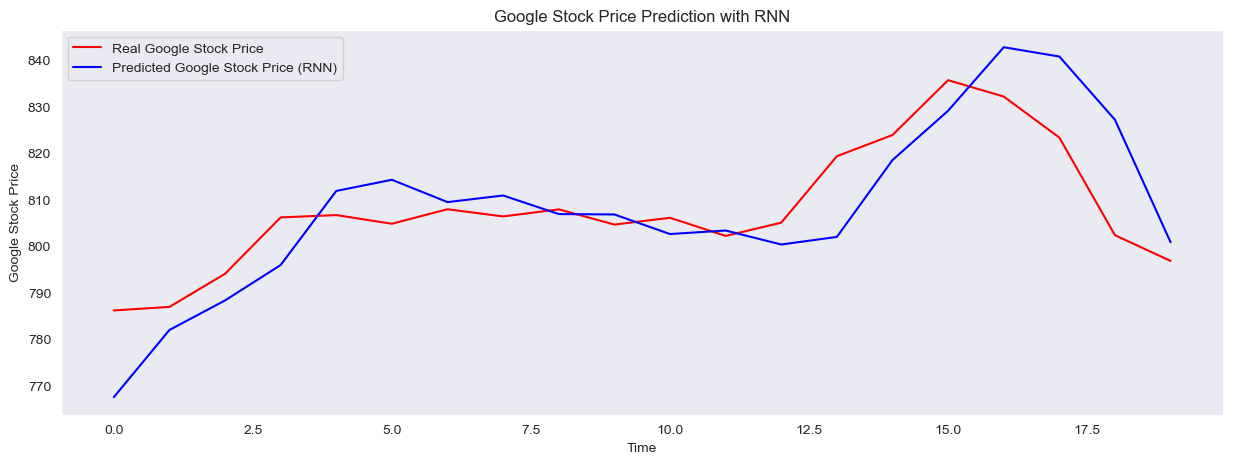

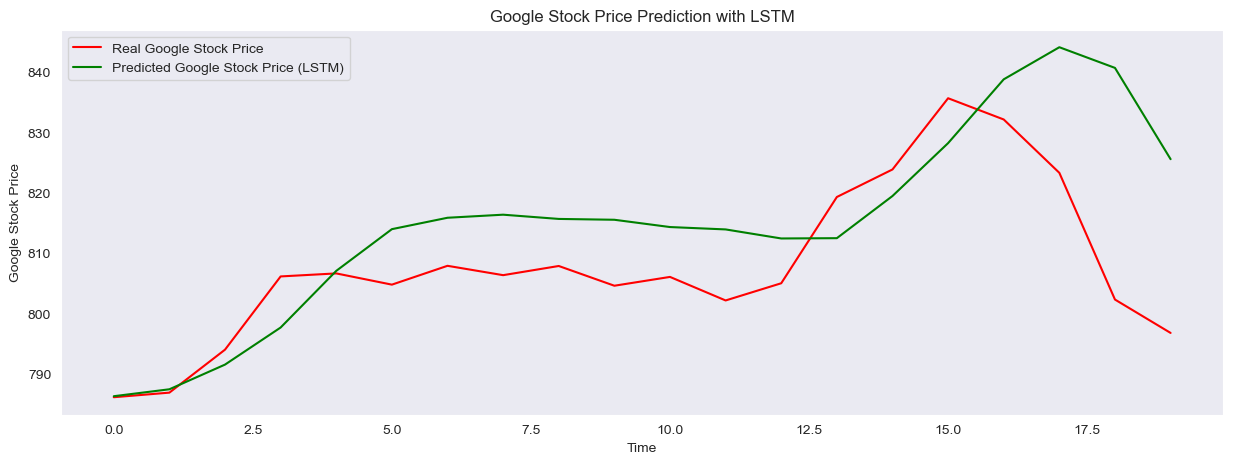

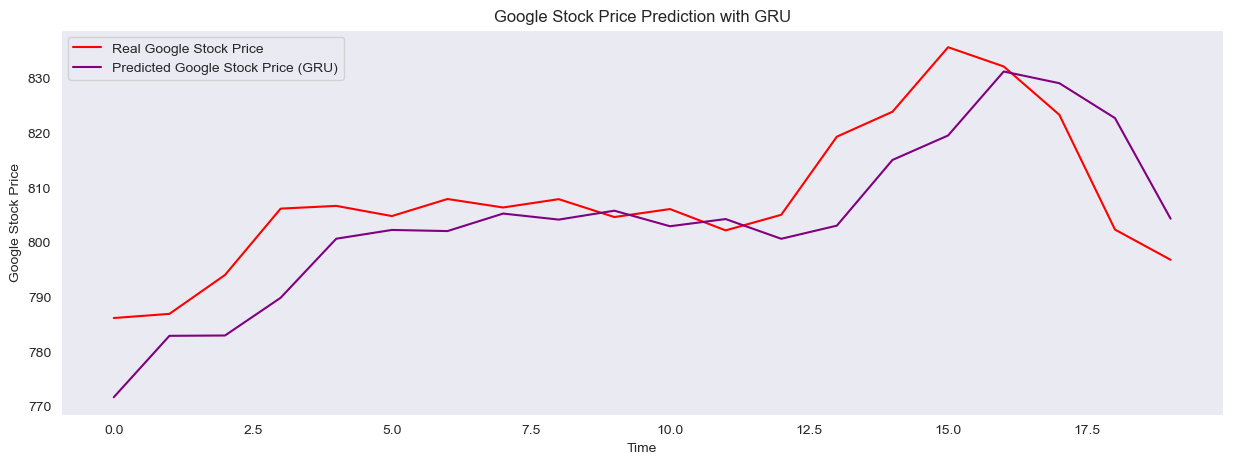

In [108]:
# Step 10: Plotting the Real vs Predicted Stock Prices for Each Model

# Plotting Real vs Predicted for RNN
plt.figure(figsize=(15, 5))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price (RNN)')
plt.title('Google Stock Price Prediction with RNN')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Plotting Real vs Predicted for LSTM
plt.figure(figsize=(15, 5))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(lstm_predicted_price, color='green', label='Predicted Google Stock Price (LSTM)')
plt.title('Google Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Plotting Real vs Predicted for GRU
plt.figure(figsize=(15, 5))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(gru_predicted_price, color='purple', label='Predicted Google Stock Price (GRU)')
plt.title('Google Stock Price Prediction with GRU')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


## Step-7 Checking RMSE and R2 Score's 

In [109]:
# Step 9: Evaluating All Models

# Real stock prices for test data
real_stock_price = test_close

# R2 Score for RNN
from sklearn.metrics import r2_score
rnn_r2 = r2_score(real_stock_price, predicted_stock_price)
print(f"RNN R2 Score: {rnn_r2}")

# RMSE for RNN
rnn_rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"RNN RMSE: {rnn_rmse}")

# R2 Score for LSTM
lstm_r2 = r2_score(real_stock_price, lstm_predicted_price)
print(f"LSTM R2 Score: {lstm_r2}")

# RMSE for LSTM
lstm_rmse = sqrt(mean_squared_error(real_stock_price, lstm_predicted_price))
print(f"LSTM RMSE: {lstm_rmse}")

# R2 Score for GRU
gru_r2 = r2_score(real_stock_price, gru_predicted_price)
print(f"GRU R2 Score: {gru_r2}")

# RMSE for GRU
gru_rmse = sqrt(mean_squared_error(real_stock_price, gru_predicted_price))
print(f"GRU RMSE: {gru_rmse}")


RNN R2 Score: 0.3622686949968429
RNN RMSE: 10.282207947570527
LSTM R2 Score: -0.10635816335284876
LSTM RMSE: 13.543015859468529
GRU R2 Score: 0.441753968102928
GRU RMSE: 9.620116625602844


## Step-8 Checking for MSE and MAPE

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [111]:
# Assuming the following variables are already defined:
# predicted_stock_price: RNN predictions
# lstm_predicted_price: LSTM predictions
# gru_predicted_price: GRU predictions
# real_stock_price: The actual stock prices (test data)

# Step 3: Calculate MSE, MAPE, and R2 for each model

# For RNN Model
rnn_mse = mean_squared_error(real_stock_price, predicted_stock_price)
rnn_mape = mean_absolute_percentage_error(real_stock_price, predicted_stock_price)
rnn_r2 = r2_score(real_stock_price, predicted_stock_price)

print(f"RNN MSE: {rnn_mse}")
print(f"RNN MAPE: {rnn_mape}%")
print(f"RNN R2 Score: {rnn_r2}")

# For LSTM Model
lstm_mse = mean_squared_error(real_stock_price, lstm_predicted_price)
lstm_mape = mean_absolute_percentage_error(real_stock_price, lstm_predicted_price)
lstm_r2 = r2_score(real_stock_price, lstm_predicted_price)

print(f"LSTM MSE: {lstm_mse}")
print(f"LSTM MAPE: {lstm_mape}%")
print(f"LSTM R2 Score: {lstm_r2}")

# For GRU Model
gru_mse = mean_squared_error(real_stock_price, gru_predicted_price)
gru_mape = mean_absolute_percentage_error(real_stock_price, gru_predicted_price)
gru_r2 = r2_score(real_stock_price, gru_predicted_price)

print(f"GRU MSE: {gru_mse}")
print(f"GRU MAPE: {gru_mape}%")
print(f"GRU R2 Score: {gru_r2}")


RNN MSE: 105.7238002770825
RNN MAPE: 0.9838010037777067%
RNN R2 Score: 0.3622686949968429
LSTM MSE: 183.41327856981607
LSTM MAPE: 1.2295620424637361%
LSTM R2 Score: -0.10635816335284876
GRU MSE: 92.54664389020026
GRU MAPE: 0.9389870701977643%
GRU R2 Score: 0.441753968102928
